In [ ]:
# Customer Segmentation

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## load data set
data = pd.read_csv('fake_transactional_data_24.csv')
## head
data.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025


In [3]:
data.shape

(10148280, 4)

In [4]:
## Segmentation by " monopoly_money_amount "

In [5]:
# Segmentation by Transaction Amount (Monopoly Money Amount)
transaction_amount = data['monopoly_money_amount'].describe()
transaction_amount

count    1.014828e+07
mean     1.839348e+01
std      8.612323e+01
min      1.450000e+00
25%      2.650000e+00
50%      6.000000e+00
75%      1.200000e+01
max      1.995000e+03
Name: monopoly_money_amount, dtype: float64

In [6]:
# Segmentation for customers based on transaction amount ranges

# bins for segmentation
bins = [-float('inf'), 10, 30, 60, float('inf')] ##  dividing range of values based on monopoly amount
labels = ['Less', 'Medium', 'High', 'Very-High']  ## grouping bins.

# Create a new column for segment labels
data['transaction_amount_segment'] = pd.cut(data['monopoly_money_amount'], bins=bins, labels=labels)
## pd.cut()- segment and sort data values into bins

## data['transaction_amount_segment']
data['transaction_amount_segment'].value_counts()  ###count 

transaction_amount_segment
Less         6750136
Medium       2491669
High          523920
Very-High     382555
Name: count, dtype: int64

In [7]:
## Transactional frequency
## total number of transactions of each account (Unique)

In [18]:
# Count the number of transactions per account
transaction_frequency = data['from_totally_fake_account'].value_counts()

# Define thresholds for segmentation
lowfreq_threshold = 50  # Only one transaction
highfreq_threshold = transaction_frequency.quantile(0.70)  # More than low frequwncy

# Segment customers based on transaction frequency
data['transaction_frequency_segment'] = pd.cut(data['from_totally_fake_account'].map(transaction_frequency), 
                                                bins=[-float('inf'), lowfreq_threshold, highfreq_threshold, float('inf')],
                                                labels=['One-Time', 'Occasional', 'Frequent'])
data['transaction_frequency_segment'].value_counts()
#print(transaction_frequency)

transaction_frequency_segment
Occasional    5997920
Frequent      4150360
One-Time            0
Name: count, dtype: int64

In [20]:
# lets look deeper

# Create a new DataFrame to store the transaction frequency for each account
transaction_frequency_df = pd.DataFrame(transaction_frequency)
transaction_frequency_df.reset_index(inplace=True)
transaction_frequency_df.columns = ['from_totally_fake_account', 'transaction_frequency']

# Segment customers based on transaction frequency
# You can define your own thresholds for segmenting customers (e.g., frequent, occasional, one-time buyers)
quartiles = transaction_frequency_df['transaction_frequency'].quantile([0.0,0.25, 0.5, 0.75,1.0])
print("Quartiles:")
print(quartiles)

def segment_customer(transaction_frequency):
    if transaction_frequency <= quartiles[0.25]:
        return 'One-Time Buyer'
    elif transaction_frequency <= quartiles[0.5]:
        return 'Occasional Buyer'
    elif transaction_frequency <= quartiles[0.75]:
        return 'Regular Buyer'
    else:
        return 'Frequent Buyer'

# Apply the segmentation function to create a new column 'customer_segment'
transaction_frequency_df['customer_segment'] = transaction_frequency_df['transaction_frequency'].apply(segment_customer)

# Display the segmented customers
print("\nSegmented Customers:")
print(transaction_frequency_df)

Quartiles:
0.00     436.0
0.25     989.0
0.50    1154.0
0.75    1500.0
1.00    2728.0
Name: transaction_frequency, dtype: float64

Segmented Customers:
      from_totally_fake_account  transaction_frequency customer_segment
0                        2331.0                   2728   Frequent Buyer
1                       74448.0                   2679   Frequent Buyer
2                       97033.0                   2665   Frequent Buyer
3                       87324.0                   2619   Frequent Buyer
4                       14877.0                   2503   Frequent Buyer
...                         ...                    ...              ...
8137                    30617.0                    537   One-Time Buyer
8138                    22078.0                    524   One-Time Buyer
8139                    68848.0                    513   One-Time Buyer
8140                    19964.0                    504   One-Time Buyer
8141                    55938.0                    436  

In [21]:
transaction_frequency_df.head(3)
#transaction_frequency_df.shape

,from_totally_fake_account,transaction_frequency,customer_segment
0,2331.0,2728,Frequent Buyer
1,74448.0,2679,Frequent Buyer
2,97033.0,2665,Frequent Buyer


In [17]:
data

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,transaction_amount_segment,transaction_frequency_segment
0,10371.0,4.00,CINEMA,01/01/2025,Less,Frequent
1,88339.0,2.40,40544,01/01/2025,Less,Occasional
2,18555.0,2.40,85149,01/01/2025,Less,Frequent
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025,Less,Frequent
4,80792.0,1.95,18555,01/01/2025,Less,Occasional
...,...,...,...,...,...,...
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025,Less,Occasional
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025,Less,Occasional
10148277,57569.0,14.00,WINE_BAR,31/12/2025,Medium,Occasional
10148278,1490.0,9.00,57569,31/12/2025,Less,Frequent


In [23]:

# Specify the account number for which you want to get the frequency
required_account_number = 80792.0	  # Example account number, replace with the desired account number

# Filter the DataFrame for the required account number
required_account_data = data[data['from_totally_fake_account'] == required_account_number]

# Count the frequency of transactions for the required account
transaction_frequency = len(required_account_data)

# Display the frequency of transactions for the required account
print(f"Frequency of transactions for account {required_account_number}: {transaction_frequency}")

Frequency of transactions for account 80792.0: 950


In [ ]:
## Segmentation by Account Type (To Randomly Generated Account):

In [24]:
# Count the number of transactions for each account type
account_type_counts = data['to_randomly_generated_account'].value_counts()
account_type_counts

to_randomly_generated_account
PUB                           834380
BAR                           770414
LOCAL_WATERING_HOLE           649043
COFFEE_SHOP                   476099
TOTALLY_A_REAL_COFFEE_SHOP    476064
                               ...  
74519                              2
24699                              2
1243                               2
95337                              2
20594                              1
Name: count, Length: 14300, dtype: int64

In [26]:
## Segmentation based on dates

In [28]:

# Convert 'not_happened_yet_date' column to datetime format
data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], format='%d/%m/%Y')

# Extract day of the week and month from the date
data['day_of_week'] = data['not_happened_yet_date'].dt.dayofweek  # Monday=0, Sunday=6
data['month'] = data['not_happened_yet_date'].dt.month

# Perform segmentation based on day of the week
# Define segmentation criteria (e.g., weekend vs. weekday)
def segment_by_day_of_week(day):
    if day in [5, 6]:  # Saturday or Sunday
        return 'Weekend'
    else:
        return 'Weekday'

data['day_segment'] = data['day_of_week'].apply(segment_by_day_of_week)

# Perform segmentation based on month (e.g., seasonal segmentation)
# Define segmentation criteria (e.g., summer vs. winter)
def segment_by_month(month):
    if month in [6, 7, 8]:  # June, July, August (summer months)
        return 'Summer'
    elif month in [12, 1, 2]:  # December, January, February (winter months)
        return 'Winter'
    else:
        return 'Other'

data['month_segment'] = data['month'].apply(segment_by_month)

# Display segmented data
print(data[['not_happened_yet_date', 'day_of_week', 'day_segment', 'month', 'month_segment']])


         not_happened_yet_date  day_of_week day_segment  month month_segment
0                   2025-01-01            2     Weekday      1        Winter
1                   2025-01-01            2     Weekday      1        Winter
2                   2025-01-01            2     Weekday      1        Winter
3                   2025-01-01            2     Weekday      1        Winter
4                   2025-01-01            2     Weekday      1        Winter
...                        ...          ...         ...    ...           ...
10148275            2025-12-31            2     Weekday     12        Winter
10148276            2025-12-31            2     Weekday     12        Winter
10148277            2025-12-31            2     Weekday     12        Winter
10148278            2025-12-31            2     Weekday     12        Winter
10148279            2025-12-31            2     Weekday     12        Winter

[10148280 rows x 5 columns]


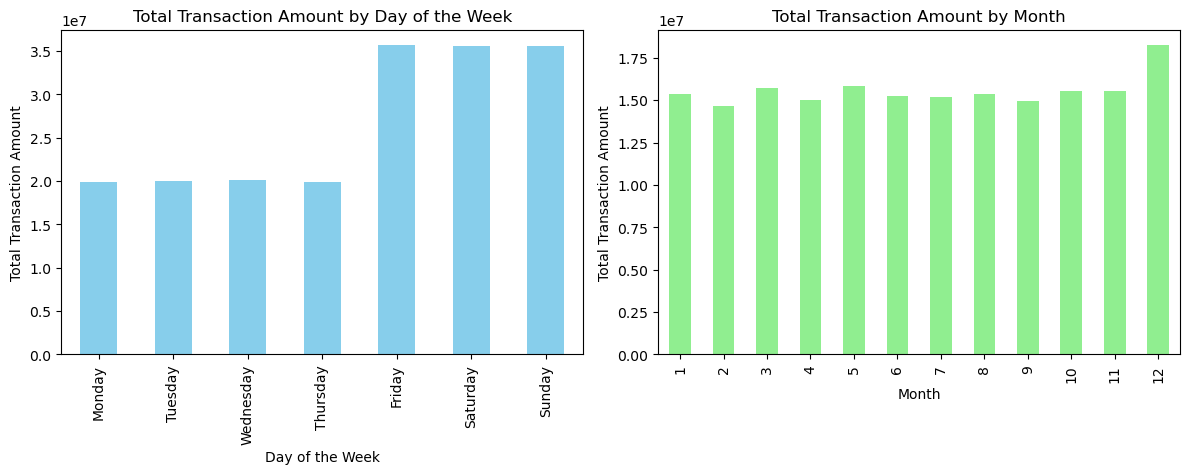

In [27]:
import matplotlib.pyplot as plt

# Calculate total transaction amounts for each day of the week
day_of_week_totals = data.groupby('day_of_week')['monopoly_money_amount'].sum()

# Calculate total transaction amounts for each month of the year
month_totals = data.groupby('month')['monopoly_money_amount'].sum()

# Define day of the week labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot bar chart for total transaction amounts by day of the week
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
day_of_week_totals.plot(kind='bar', color='skyblue')
plt.title('Total Transaction Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Transaction Amount')
plt.xticks(range(7), day_labels)

# Plot bar chart for total transaction amounts by month
plt.subplot(1, 2, 2)
month_totals.plot(kind='bar', color='lightgreen')
plt.title('Total Transaction Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.xticks(range(12), range(1, 13))  # Months are indexed from 1 to 12

plt.tight_layout()
plt.show()
